In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define binary pixel patterns for A, B, and C (5x5 grid flattened to 25 inputs)
patterns = {
    'A': np.array([
        [0,1,1,1,0,
         1,0,0,0,1,
         1,1,1,1,1,
         1,0,0,0,1,
         1,0,0,0,1]
    ]),
    'B': np.array([
        [1,1,1,1,0,
         1,0,0,0,1,
         1,1,1,1,0,
         1,0,0,0,1,
         1,1,1,1,0]
    ]),
    'C': np.array([
        [0,1,1,1,1,
         1,0,0,0,0,
         1,0,0,0,0,
         1,0,0,0,0,
         0,1,1,1,1]
    ])
}

# Labels: One-hot encoding
labels = {
    'A': np.array([[1, 0, 0]]),
    'B': np.array([[0, 1, 0]]),
    'C': np.array([[0, 0, 1]])
}

In [3]:
# Prepare training data
X = np.vstack([patterns['A'], patterns['B'], patterns['C']])
y = np.vstack([labels['A'], labels['B'], labels['C']])

In [4]:
# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
# Initialize weights
np.random.seed(42)
input_size = 25
hidden_size = 16
output_size = 3

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training parameters
epochs = 1000
learning_rate = 0.1
loss_history = []
accuracy_history = []

In [6]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)
    loss_history.append(loss)

    # Accuracy
    predictions = np.argmax(a2, axis=1)
    targets = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == targets)
    accuracy_history.append(accuracy)

    # Backpropagation
    error_output = y - a2
    delta_output = error_output * sigmoid_derivative(a2)

    error_hidden = delta_output.dot(W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 += a1.T.dot(delta_output) * learning_rate
    b2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(delta_hidden) * learning_rate
    b1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

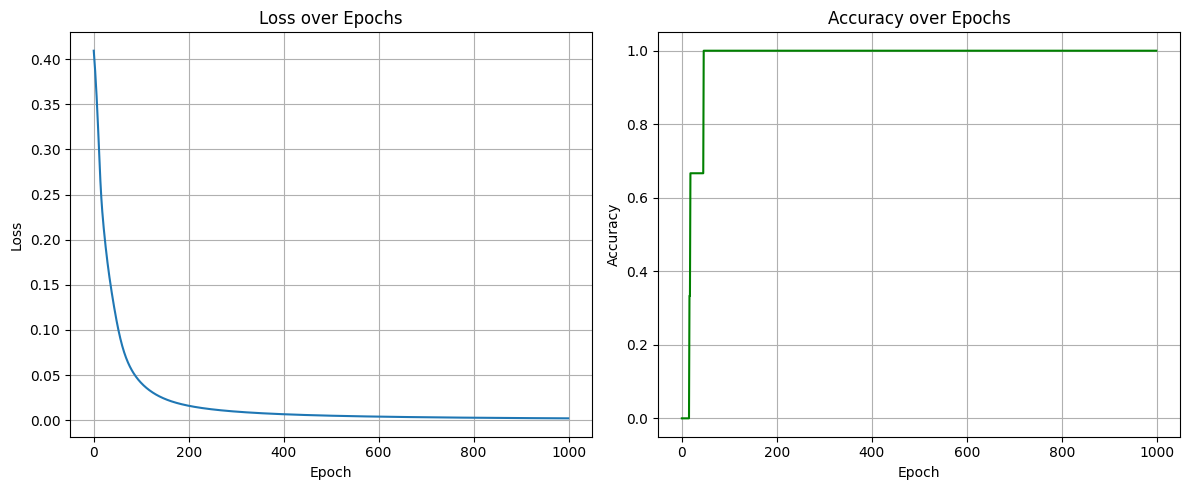

In [7]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy', color='green')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()